use this later: https://ourworldindata.org/grapher/deaths-from-infectious-diseases?time=latest

In [1]:
!pip install pandas requests beautifulsoup4
!pip install pygam
!pip install tensorflow
!pip install scikit-learn
!pip install gdown==v4.6.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


In [2]:
import requests
import pandas as pd

from bs4 import BeautifulSoup

from pygam import LinearGAM, s

In [3]:
# Fetch the data.
annual_co2 = pd.read_csv("https://ourworldindata.org/grapher/annual-co2-emissions-per-country.csv?v=1&csvType=full&useColumnShortNames=false", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
annual_co2_metadata = requests.get("https://ourworldindata.org/grapher/annual-co2-emissions-per-country.metadata.json?v=1&csvType=full&useColumnShortNames=false").json()

In [4]:
# Fetch the data.
annual_ghe = pd.read_csv("https://ourworldindata.org/grapher/total-ghg-emissions.csv?v=1&csvType=full&useColumnShortNames=false", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata (Green House Gases)
annual_ghe_metadata = requests.get("https://ourworldindata.org/grapher/total-ghg-emissions.metadata.json?v=1&csvType=full&useColumnShortNames=false").json()

In [5]:
# Fetch the data.
annual_deforest = pd.read_csv("https://ourworldindata.org/grapher/deforestation-share-forest-area.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
annual_deforest_metadata = requests.get("https://ourworldindata.org/grapher/deforestation-share-forest-area.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [6]:
# Fetch the data.
tree_cover_loss_wildfires = pd.read_csv("https://ourworldindata.org/grapher/tree-cover-loss-from-wildfires.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
tree_cover_loss_wildfires_metadata = requests.get("https://ourworldindata.org/grapher/tree-cover-loss-from-wildfires.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [7]:
energy_consumption = pd.read_csv("https://ourworldindata.org/grapher/primary-energy-cons.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
energy_consumption_metadata = requests.get("https://ourworldindata.org/grapher/primary-energy-cons.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [8]:
# Fetch the data.
climate_support = pd.read_csv("https://ourworldindata.org/grapher/support-policies-climate.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
climate_support_metadata = requests.get("https://ourworldindata.org/grapher/support-policies-climate.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [9]:
# Fetch the data.
average_precipitation = pd.read_csv("https://ourworldindata.org/grapher/average-precipitation-per-year.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
average_precipitation_metadata = requests.get("https://ourworldindata.org/grapher/average-precipitation-per-year.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [10]:
# GDP PPP per capita (2017 constant)
gdp_ppp_per_capita = pd.read_csv("https://ourworldindata.org/grapher/gdp-per-capita-worldbank.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
gdp_ppp_per_capita_metadata = requests.get("https://ourworldindata.org/grapher/gdp-per-capita-worldbank.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [11]:
# GDP nominal per capita (2015 constant)
gdp_nominal_per_capita = pd.read_csv("https://ourworldindata.org/grapher/gdp-per-capita-world-bank-constant-usd.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
gdp_nominal_per_capita_metadata = requests.get("https://ourworldindata.org/grapher/gdp-per-capita-world-bank-constant-usd.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

# Convert 2015 dollars to 2017 dollars
gdp_nominal_per_capita['ny_gdp_pcap_kd'] = gdp_nominal_per_capita['ny_gdp_pcap_kd'] * 64623.125 / 62789.130

In [12]:
# inflation rate
inflation_rate = pd.read_csv("https://ourworldindata.org/grapher/inflation-of-consumer-prices.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
inflation_rate_metadata = requests.get("https://ourworldindata.org/grapher/inflation-of-consumer-prices.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()
inflation_rate = inflation_rate.rename(columns={'fp_cpi_totl_zg': 'inflation_rate'})

In [13]:
# crime rate (homicide rate)
crime_rate = pd.read_csv("https://ourworldindata.org/grapher/homicide-rate-unodc.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
crime_rate_metadata = requests.get("https://ourworldindata.org/grapher/homicide-rate-unodc.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()
crime_rate = crime_rate.rename(columns={'value__category_total__sex_total__age_total__unit_of_measurement_rate_per_100_000_population': 'crime_rate'})

In [14]:
# internet_penetration_rate
internet_penetration_rate = pd.read_csv("https://ourworldindata.org/grapher/share-of-individuals-using-the-internet.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
internet_penetration_rate_metadata = requests.get("https://ourworldindata.org/grapher/share-of-individuals-using-the-internet.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()
internet_penetration_rate = internet_penetration_rate.rename(columns={'it_net_user_zs': 'internet_penetration_rate'})
internet_penetration_rate

,Entity,Code,Year,internet_penetration_rate
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
6950,Zimbabwe,ZWE,2017,24.400000
6951,Zimbabwe,ZWE,2018,25.000000
6952,Zimbabwe,ZWE,2019,26.588274
6953,Zimbabwe,ZWE,2020,29.298565


In [15]:
# intl_tourist_spending
intl_tourist_spending = pd.read_csv("https://ourworldindata.org/grapher/average-expenditures-of-tourists-abroad.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
intl_tourist_spending_metadata = requests.get("https://ourworldindata.org/grapher/average-expenditures-of-tourists-abroad.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()
intl_tourist_spending = intl_tourist_spending.rename(columns={'outbound_exp_us_cpi_adjust': 'intl_tourist_spending'})

In [16]:
# Death from natural disaster
natural_disaster_death = pd.read_csv("https://ourworldindata.org/grapher/deaths-from-natural-disasters.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
natural_disaster_death_metadata = requests.get("https://ourworldindata.org/grapher/deaths-from-natural-disasters.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()
natural_disaster_death = natural_disaster_death.rename(columns={'death_count__age_group_allages__sex_both_sexes__cause_natural_disasters': 'natural_disaster_death'})

In [17]:
# population density
population_density = pd.read_csv("https://ourworldindata.org/grapher/population-density.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
population_density_metadata = requests.get("https://ourworldindata.org/grapher/population-density.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [18]:
# Get UNESCO World Heritage Site list
url = "https://en.wikipedia.org/wiki/World_Heritage_Sites_by_country"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')  # Assuming there's only one table on the page
number_of_UNESCO_WHS = pd.read_html(str(table))[0]

number_of_UNESCO_WHS = number_of_UNESCO_WHS[['Country', 'Total sites']]
number_of_UNESCO_WHS.rename(columns={'Total sites': 'number_of_UNESCO_WHS', 'Country': 'Entity'}, inplace=True)

<ipython-input-18-fe4c277b1ac5>:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  number_of_UNESCO_WHS = pd.read_html(str(table))[0]


In [19]:
# Get population
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')  # Assuming there's only one table on the page
population = pd.read_html(str(table))[0]

population = population[['Location', 'Population']]
population.rename(columns={'Location': 'Entity'}, inplace=True)

<ipython-input-19-cf2390e3c3c2>:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  population = pd.read_html(str(table))[0]


In [20]:
# political stablility (lower is better)
url = "https://en.wikipedia.org/wiki/List_of_countries_by_Fragile_States_Index"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')  # Assuming there's only one table on the page
political_stability = pd.read_html(str(table))[0]

political_stability = political_stability[['Country', '2024 score']]
political_stability.rename(columns={'2024 score': 'political_stability', 'Country': 'Entity'}, inplace=True)

<ipython-input-20-5ace2fceaa0f>:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  political_stability = pd.read_html(str(table))[0]


In [21]:
# infrastructure
url = "https://worldpopulationreview.com/country-rankings/infrastructure-by-country"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')  # Assuming there's only one table on the page
infrastructure = pd.read_html(str(table))[0]

infrastructure = infrastructure[['Country', 'Overall Infrastructure Score', 'Basic Infrastructure Score', 'Technological Infrastructure Score', 'Scientific Infrastructure Score', 'Health and Environment Score', 'Education Score']]
infrastructure.rename(columns={'Country': 'Entity'}, inplace=True)

<ipython-input-21-79b5e3f7244a>:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  infrastructure = pd.read_html(str(table))[0]


In [22]:
# Get dataset from Google Drive public link
# https://drive.google.com/file/d/1Qq-bkEyljaJK7rlnDSx7UTd3JLr-mwaM/view?usp=sharing (wrong link)
# https://drive.google.com/file/d/1FKaZWXoVQ8pIIPFSrRWR8vofTvU20LP6/view?usp=sharing (correct link)
!gdown --id 1FKaZWXoVQ8pIIPFSrRWR8vofTvU20LP6

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FKaZWXoVQ8pIIPFSrRWR8vofTvU20LP6
To: /content/IHME-GBD_2021_DATA-60e1e0e5-1.csv
100% 1.33M/1.33M [00:00<00:00, 132MB/s]


In [23]:
disease_death = pd.read_csv("/content/IHME-GBD_2021_DATA-60e1e0e5-1.csv")
disease_death

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,19,Timor-Leste,3,Both,22,All ages,956,Respiratory infections and tuberculosis,3,Rate,1980,424.527743,505.166041,358.314075
1,1,Deaths,35,Georgia,3,Both,22,All ages,956,Respiratory infections and tuberculosis,3,Rate,1980,67.821024,74.941372,61.472335
2,1,Deaths,52,Romania,3,Both,22,All ages,956,Respiratory infections and tuberculosis,3,Rate,1980,59.821983,62.123312,57.549842
3,1,Deaths,84,Ireland,3,Both,22,All ages,956,Respiratory infections and tuberculosis,3,Rate,1980,63.974523,67.311486,59.733214
4,1,Deaths,85,Israel,3,Both,22,All ages,956,Respiratory infections and tuberculosis,3,Rate,1980,20.834051,21.878345,19.487265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8563,1,Deaths,55,Slovenia,3,Both,22,All ages,956,Respiratory infections and tuberculosis,3,Rate,2020,163.696418,205.263714,123.032188
8564,1,Deaths,206,Gambia,3,Both,22,All ages,956,Respiratory infections and tuberculosis,3,Rate,2020,166.683586,188.563038,147.228757
8565,1,Deaths,186,Seychelles,3,Both,22,All ages,956,Respiratory infections and tuberculosis,3,Rate,2020,64.351100,71.620020,57.010595
8566,1,Deaths,107,Barbados,3,Both,22,All ages,956,Respiratory infections and tuberculosis,3,Rate,2020,49.956221,58.797000,42.001153


In [24]:
disease_death = disease_death[['location_name', 'year', 'val']]
disease_death.rename(columns={'location_name': 'Entity', 'year': 'Year', 'val': 'disease_death'}, inplace=True)

<ipython-input-24-a095d46f6c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_death.rename(columns={'location_name': 'Entity', 'year': 'Year', 'val': 'disease_death'}, inplace=True)


In [25]:
# Rename United States of America to United States
disease_death['Entity'] = disease_death['Entity'].replace('United States of America', 'United States')

<ipython-input-25-fbae728594d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_death['Entity'] = disease_death['Entity'].replace('United States of America', 'United States')


In [26]:
disease_death

,Entity,Year,disease_death
0,Timor-Leste,1980,424.527743
1,Georgia,1980,67.821024
2,Romania,1980,59.821983
3,Ireland,1980,63.974523
4,Israel,1980,20.834051
...,...,...,...
8563,Slovenia,2020,163.696418
8564,Gambia,2020,166.683586
8565,Seychelles,2020,64.351100
8566,Barbados,2020,49.956221


In [27]:
# Average temperature
average_monthly_surface_temp = pd.read_csv("https://ourworldindata.org/grapher/average-monthly-surface-temperature.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
average_monthly_surface_temp_metadata = requests.get("https://ourworldindata.org/grapher/average-monthly-surface-temperature.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()
average_monthly_surface_temp.rename(columns={'year': 'Year'}, inplace=True)

In [28]:
average_monthly_surface_temp

,Entity,Code,Year,Day,temperature_2m,temperature_2m.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695
...,...,...,...,...,...,...
198505,Zimbabwe,ZWE,2024,2024-06-15,17.436783,22.235535
198506,Zimbabwe,ZWE,2024,2024-07-15,18.837706,22.235535
198507,Zimbabwe,ZWE,2024,2024-08-15,20.559408,22.235535
198508,Zimbabwe,ZWE,2024,2024-09-15,23.635218,22.235535


In [29]:
average_yearly_temp = average_monthly_surface_temp.groupby(['Entity', 'Code', 'Year'])['temperature_2m'].mean().reset_index()
average_yearly_temp

,Entity,Code,Year,temperature_2m
0,Afghanistan,AFG,1940,11.327695
1,Afghanistan,AFG,1941,13.324756
2,Afghanistan,AFG,1942,12.885449
3,Afghanistan,AFG,1943,11.524769
4,Afghanistan,AFG,1944,12.143665
...,...,...,...,...
16570,Zimbabwe,ZWE,2020,21.785587
16571,Zimbabwe,ZWE,2021,21.573132
16572,Zimbabwe,ZWE,2022,21.591952
16573,Zimbabwe,ZWE,2023,22.349144


In [30]:
# Fetch the data.
international_tourist_trips = pd.read_csv("https://ourworldindata.org/grapher/international-tourist-trips.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
international_tourist_trips_metadata = requests.get("https://ourworldindata.org/grapher/international-tourist-trips.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [31]:
international_tourist_trips

,Entity,Code,Year,in_tour_arrivals_ovn_vis_tourists
0,Albania,ALB,2007,1062000.0
1,Albania,ALB,2008,1247000.0
2,Albania,ALB,2009,1711000.0
3,Albania,ALB,2010,2191000.0
4,Albania,ALB,2011,2469000.0
...,...,...,...,...
5108,Zimbabwe,ZWE,1997,1281000.0
5109,Zimbabwe,ZWE,1998,1986000.0
5110,Zimbabwe,ZWE,1999,2101000.0
5111,Zimbabwe,ZWE,2000,1868000.0


In [32]:
# Merge data

# Normal merge (from same source)
merge_df = pd.merge(international_tourist_trips, average_yearly_temp, on = ["Entity", "Code", "Year"], how = "inner")
merge_df = pd.merge(merge_df, annual_co2, on = ["Entity", "Code", "Year"], how = "inner")
merge_df = pd.merge(merge_df, annual_ghe, on = ["Entity", "Code", "Year"], how = "inner")
# merge_df = pd.merge(merge_df, annual_deforest, on = ["Entity", "Code", "Year"], how = "inner")
# merge_df = pd.merge(merge_df, tree_cover_loss_wildfires, on = ["Entity", "Code", "Year"], how = "inner")
merge_df = pd.merge(merge_df, energy_consumption, on = ["Entity", "Code", "Year"], how = "inner")
# merge_df = pd.merge(merge_df, climate_support, on = ["Entity", "Code", "Year"], how = "inner") (Only 1 year, can't merge)
merge_df = pd.merge(merge_df, average_precipitation, on = ["Entity", "Code", "Year"], how = "inner")
merge_df = pd.merge(merge_df, gdp_ppp_per_capita, on = ["Entity", "Code", "Year"], how = "inner")
merge_df = pd.merge(merge_df, gdp_nominal_per_capita, on = ["Entity", "Code", "Year"], how = "inner")
merge_df = pd.merge(merge_df, inflation_rate, on = ["Entity", "Code", "Year"], how = "inner")
merge_df = pd.merge(merge_df, crime_rate, on = ["Entity", "Code", "Year"], how = "inner")
# merge_df = pd.merge(merge_df, internet_penetration_rate, on = ["Entity", "Code", "Year"], how = "inner")
merge_df = pd.merge(merge_df, intl_tourist_spending, on = ["Entity", "Code", "Year"], how = "inner")
# merge_df = pd.merge(merge_df, natural_disaster_death, on = ["Entity", "Code", "Year"], how = "inner") (negligible impact)
# merge_df = pd.merge(merge_df, population_density, on = ["Entity", "Code", "Year"], how = "inner") (negligible impact)

# Merge from Wiki
merge_df = pd.merge(merge_df, number_of_UNESCO_WHS, on = ["Entity"], how = "left")
merge_df = pd.merge(merge_df, population, on = ["Entity"], how = "inner")
merge_df = pd.merge(merge_df, political_stability, on = ["Entity"], how = "inner")
merge_df = pd.merge(merge_df, infrastructure, on = ["Entity"], how = "inner")

# Merge from Google Drive upload
merge_df = pd.merge(merge_df, disease_death, on = ["Entity", "Year"], how = "inner")

# merge_df = merge_df[merge_df["Entity"].isin(interested_country_list)]

merge_df['purchasing_power_index'] = merge_df['ny_gdp_pcap_pp_kd'] / merge_df['ny_gdp_pcap_kd']
merge_df

,Entity,Code,Year,in_tour_arrivals_ovn_vis_tourists,temperature_2m,Annual CO₂ emissions,Annual greenhouse gas emissions in CO₂ equivalents,primary_energy_consumption__twh,total_precipitation,ny_gdp_pcap_pp_kd,...,Population,political_stability,Overall Infrastructure Score,Basic Infrastructure Score,Technological Infrastructure Score,Scientific Infrastructure Score,Health and Environment Score,Education Score,disease_death,purchasing_power_index
0,Australia,AUS,1998,3825000.0,22.450620,3.341358e+08,6.802726e+08,1246.3304,538.79930,35990.387,...,27122411,19.6,67.8,55.2,53.0,55.3,63.3,63.0,12.996781,0.813861
1,Australia,AUS,1999,4109000.0,21.750825,3.439595e+08,6.966192e+08,1297.3473,524.85620,37388.590,...,27122411,19.6,67.8,55.2,53.0,55.3,63.3,63.0,12.267747,0.813861
2,Australia,AUS,2000,4530000.0,21.287555,3.500080e+08,7.450101e+08,1305.2594,656.68506,38412.640,...,27122411,19.6,67.8,55.2,53.0,55.3,63.3,63.0,14.060435,0.813861
3,Australia,AUS,2001,4435000.0,21.458198,3.577837e+08,7.261418e+08,1315.3853,500.80030,38690.570,...,27122411,19.6,67.8,55.2,53.0,55.3,63.3,63.0,14.299106,0.813861
4,Australia,AUS,2002,4420000.0,22.310006,3.625365e+08,6.940259e+08,1341.7450,296.48980,39775.270,...,27122411,19.6,67.8,55.2,53.0,55.3,63.3,63.0,15.480272,0.813861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,United States,USA,2017,77186744.0,10.459979,5.212162e+09,6.156777e+09,25823.8440,871.91260,59907.754,...,335893238,44.5,73.7,54.2,57.2,79.4,56.9,59.6,21.282173,1.000000
1157,United States,USA,2018,79745920.0,10.083268,5.377797e+09,6.305474e+09,26768.9860,923.78710,61348.457,...,335893238,44.5,73.7,54.2,57.2,79.4,56.9,59.6,21.545748,1.000000
1158,United States,USA,2019,79442000.0,9.849836,5.262145e+09,6.216229e+09,26578.4940,938.00900,62470.930,...,335893238,44.5,73.7,54.2,57.2,79.4,56.9,59.6,20.054191,1.000000
1159,United States,USA,2020,19212000.0,10.273098,4.714628e+09,5.651509e+09,24622.6460,813.39215,60158.910,...,335893238,44.5,73.7,54.2,57.2,79.4,56.9,59.6,147.990008,1.000000


In [33]:
print(merge_df['Entity'].unique())

['Australia' 'Austria' 'Bahrain' 'Belgium' 'Botswana' 'Brazil' 'Bulgaria'
 'Canada' 'Chile' 'China' 'Colombia' 'Croatia' 'Cyprus' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Hungary'
 'Iceland' 'India' 'Ireland' 'Italy' 'Jordan' 'Kazakhstan' 'Kuwait'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malaysia' 'Mexico' 'Mongolia'
 'Netherlands' 'New Zealand' 'Nigeria' 'Norway' 'Peru' 'Philippines'
 'Poland' 'Portugal' 'Qatar' 'Romania' 'Saudi Arabia' 'Slovakia'
 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Thailand'
 'Turkey' 'United Arab Emirates' 'United Kingdom' 'United States']


In [34]:
print(merge_df[merge_df['Entity']=="Kuwait"]['number_of_UNESCO_WHS'])

594   NaN
595   NaN
596   NaN
597   NaN
598   NaN
599   NaN
600   NaN
601   NaN
602   NaN
603   NaN
604   NaN
605   NaN
606   NaN
607   NaN
608   NaN
609   NaN
610   NaN
Name: number_of_UNESCO_WHS, dtype: float64


In [35]:
# interested_country_list = ["France", "Spain", "United States", "China", "Italy", "Turkey", "Mexico", "Thailand", "Germany",
#                            "United Kingdom", "Japan", "Austria"]
# merge_df = merge_df[merge_df["Entity"].isin(interested_country_list)]

In [36]:
# Count the number of year that each entity has
year_count = merge_df.groupby('Entity').size().reset_index(name='year_count')
#year_count

# Only keep the entity with year_count > 10
# merge_df = merge_df[merge_df['Entity'].isin(year_count[year_count['year_count'] > 25]['Entity'])]

In [37]:
merge_df.columns

Index(['Entity', 'Code', 'Year', 'in_tour_arrivals_ovn_vis_tourists',
       'temperature_2m', 'Annual CO₂ emissions',
       'Annual greenhouse gas emissions in CO₂ equivalents',
       'primary_energy_consumption__twh', 'total_precipitation',
       'ny_gdp_pcap_pp_kd', 'ny_gdp_pcap_kd', 'inflation_rate', 'crime_rate',
       'intl_tourist_spending', 'number_of_UNESCO_WHS', 'Population',
       'political_stability', 'Overall Infrastructure Score',
       'Basic Infrastructure Score', 'Technological Infrastructure Score',
       'Scientific Infrastructure Score', 'Health and Environment Score',
       'Education Score', 'disease_death', 'purchasing_power_index'],
      dtype='object')

In [38]:
print(merge_df['Entity'].unique())

['Australia' 'Austria' 'Bahrain' 'Belgium' 'Botswana' 'Brazil' 'Bulgaria'
 'Canada' 'Chile' 'China' 'Colombia' 'Croatia' 'Cyprus' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Hungary'
 'Iceland' 'India' 'Ireland' 'Italy' 'Jordan' 'Kazakhstan' 'Kuwait'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malaysia' 'Mexico' 'Mongolia'
 'Netherlands' 'New Zealand' 'Nigeria' 'Norway' 'Peru' 'Philippines'
 'Poland' 'Portugal' 'Qatar' 'Romania' 'Saudi Arabia' 'Slovakia'
 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Thailand'
 'Turkey' 'United Arab Emirates' 'United Kingdom' 'United States']


In [39]:
# # Print the corrolation matrix
# # Assuming merge_df is your merged DataFrame
# # Selecting the relevant columns for correlation calculation
# columns_of_interest = ['in_tour_arrivals_ovn_vis_tourists', 'temperature_2m', 'temperature_2m.1',
#                        'Annual CO₂ emissions', 'Annual greenhouse gas emissions in CO₂ equivalents',
#                        'primary_energy_consumption__twh', 'total_precipitation', 'ny_gdp_pcap_pp_kd', 'ny_gdp_pcap_kd']

# # Creating a DataFrame with only these columns
# corr_df = merge_df[columns_of_interest]

# # Calculating the correlation matrix
# correlation_matrix = corr_df.corr()

# # Printing the correlation matrix
# print(correlation_matrix)

In [40]:
# Define the columns of interest
columns_of_interest = merge_df.columns.drop(['Code', 'Entity', 'Year'])

# Subset the DataFrame to include only the numeric columns of interest
numeric_df = merge_df[columns_of_interest]

# Calculate the correlations
target_column = 'in_tour_arrivals_ovn_vis_tourists'
correlations = numeric_df.corr()[target_column]

# Print correlations
print(correlations.sort_values(ascending=False))

in_tour_arrivals_ovn_vis_tourists                     1.000000
number_of_UNESCO_WHS                                  0.749004
intl_tourist_spending                                 0.600260
primary_energy_consumption__twh                       0.525072
Annual CO₂ emissions                                  0.480139
Annual greenhouse gas emissions in CO₂ equivalents    0.444471
Scientific Infrastructure Score                       0.443699
Overall Infrastructure Score                          0.259535
Population                                            0.232312
Health and Environment Score                          0.202516
Technological Infrastructure Score                    0.192875
Education Score                                       0.130696
ny_gdp_pcap_pp_kd                                     0.102353
Basic Infrastructure Score                            0.098619
ny_gdp_pcap_kd                                        0.090804
political_stability                                   0

# Approach 1: Random Forest Regressor

## V1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = merge_df

# Drop "Code" column
data = data.drop(columns=['Code'])

# Convert "Entity" to numerical codes
entity_dict = {entity: idx for idx, entity in enumerate(data['Entity'].unique())}
data['Entity'] = data['Entity'].map(entity_dict)

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])  # Features
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1279334.6818025752
Mean Squared Error (MSE): 5466603023462.188
R² Score: 0.9863204565399689


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Evaluate the model using MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.16751565446978456


In [ ]:
print(y_test.mean())

14042920.403433476


In [ ]:
# Calculate the mean of the actual values
mean_y_true = np.mean(y_test)

# Calculate Relative MAE
relative_mae = mae / mean_y_true
print(f"Relative Mean Absolute Error (Relative MAE): {relative_mae}")

Relative Mean Absolute Error (Relative MAE): 0.09110175412585687


'''
MAPE values less than 10%: Considered very good

MAPE values between 10% and 20%: Considered good

MAPE values between 20% and 50%: Considered acceptable

MAPE values more than 50%: Considered falsely predicted
'''

Source: https://www.researchgate.net/figure/nterpretation-of-typical-MAPE-values_tbl1_257812432

In [ ]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
538,10951000.0,10395460.0
673,945000.0,981640.0
578,4150000.0,3846628.0
242,2100000.0,2003466.0
1063,8534000.0,9209240.0
...,...,...
3,4435000.0,4476770.0
737,301000.0,366130.0
717,18665000.0,20448860.0
842,4372000.0,3444520.0


In [ ]:
# Manually calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

print(calculate_mape(y_test, y_pred))

16.751565446978457


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Sequential Forward Selection
sfs = SequentialFeatureSelector(RandomForestRegressor(random_state=42),
                                 n_features_to_select=10,  # You can specify the number of features to select
                                 direction='forward',
                                 scoring='r2',
                                 cv=5)  # 5-fold cross-validation
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[sfs.get_support()]
print("Selected Features:", selected_features)

# Train and evaluate using selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)

print("R² Score with selected features:", r2_score(y_test, y_pred))

Selected Features: Index(['Entity', 'Year', 'Population', 'political_stability',
       'Overall Infrastructure Score', 'Basic Infrastructure Score',
       'Technological Infrastructure Score', 'Scientific Infrastructure Score',
       'Health and Environment Score', 'Education Score'],
      dtype='object')
R² Score with selected features: 0.992976961593673


In [ ]:
# Manually calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

print(calculate_mape(y_test, y_pred))

10.787846386320789


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 911503.6957939914
Mean Squared Error (MSE): 2806538324768.8657
R² Score: 0.992976961593673


In [ ]:
# Calculate the mean of the actual values
mean_y_true = np.mean(y_test)

# Calculate Relative MAE
relative_mae = mae / mean_y_true
print(f"Relative Mean Absolute Error (Relative MAE): {relative_mae}")

Relative Mean Absolute Error (Relative MAE): 0.06490841431894252


In [ ]:
rf_selected_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_selected_df

,Actual,Predicted
538,10951000.0,11211740.0
673,945000.0,951058.0
578,4150000.0,4197817.0
242,2100000.0,1896650.0
1063,8534000.0,8820850.0
...,...,...
3,4435000.0,4427260.0
737,301000.0,332590.0
717,18665000.0,20011620.0
842,4372000.0,3676570.0


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Sequential Forward Selection
sfs = SequentialFeatureSelector(RandomForestRegressor(random_state=42),
                                 n_features_to_select=10,  # You can specify the number of features to select
                                 direction='forward',
                                 scoring='r2',
                                 cv=5)  # 5-fold cross-validation
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[sfs.get_support()]
print("Selected Features:", selected_features)

# Train and evaluate using selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)

print("R² Score with selected features:", r2_score(y_test, y_pred))

Selected Features: Index(['Entity', 'Year', 'Population', 'political_stability',
       'Overall Infrastructure Score', 'Basic Infrastructure Score',
       'Technological Infrastructure Score', 'Scientific Infrastructure Score',
       'Health and Environment Score', 'Education Score'],
      dtype='object')
R² Score with selected features: 0.992976961593673


In [ ]:
# Manually calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

print(calculate_mape(y_test, y_pred))

10.787846386320789


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 911503.6957939914
Mean Squared Error (MSE): 2806538324768.8657
R² Score: 0.992976961593673


In [ ]:
# Calculate the mean of the actual values
mean_y_true = np.mean(y_test)

# Calculate Relative MAE
relative_mae = mae / mean_y_true
print(f"Relative Mean Absolute Error (Relative MAE): {relative_mae}")

Relative Mean Absolute Error (Relative MAE): 0.06490841431894252


In [ ]:
rf_selected_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_selected_df

,Actual,Predicted
538,10951000.0,11211740.0
673,945000.0,951058.0
578,4150000.0,4197817.0
242,2100000.0,1896650.0
1063,8534000.0,8820850.0
...,...,...
3,4435000.0,4427260.0
737,301000.0,332590.0
717,18665000.0,20011620.0
842,4372000.0,3676570.0


In [ ]:
sbs = SequentialFeatureSelector(RandomForestRegressor(random_state=42),
                                 n_features_to_select=5,
                                 direction='backward',
                                 scoring='r2',
                                 cv=5)
sbs.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[sbs.get_support()]
print("Selected Features:", selected_features)

# Train and evaluate using selected features
X_train_selected = sbs.transform(X_train)
X_test_selected = sbs.transform(X_test)

rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)

print("R² Score with selected features:", r2_score(y_test, y_pred))

Selected Features: Index(['Year', 'Population', 'political_stability',
       'Basic Infrastructure Score', 'Education Score'],
      dtype='object')
R² Score with selected features: 0.9934156462410679


In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train and evaluate using selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)

print("R² Score with selected features:", r2_score(y_test, y_pred))

Selected Features: Index(['Entity', 'Year', 'Annual CO₂ emissions',
       'Annual greenhouse gas emissions in CO₂ equivalents',
       'primary_energy_consumption__twh', 'total_precipitation',
       'intl_tourist_spending', 'number_of_UNESCO_WHS',
       'Basic Infrastructure Score', 'Technological Infrastructure Score'],
      dtype='object')
R² Score with selected features: 0.9839046274849685


In [ ]:
# Manually calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

print(calculate_mape(y_test, y_pred))

17.144637087453887


## V2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = merge_df

# Drop "Code" column
data = data.drop(columns=['Code'])

# Convert "Entity" to numerical codes
entity_dict = {entity: idx for idx, entity in enumerate(data['Entity'].unique())}
data['Entity'] = data['Entity'].map(entity_dict)
data = data.sort_values(by='Year')

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])  # Features
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

# First 80% train, last 20% test
X_train, y_train = X[:int(len(X) * 0.8)], y[:int(len(X) * 0.8)]
X_test, y_test = X[int(len(X) * 0.8):], y[int(len(X) * 0.8):]

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 5345554.27527897
Mean Squared Error (MSE): 102924216155598.9
R² Score: 0.743548915906378


In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = merge_df

# Filter the dataset to include only years <= 2019
data = data[data['Year'] <= 2019]

# Drop "Code" column
data = data.drop(columns=['Code'])

# Convert "Entity" to numerical codes
entity_dict = {entity: idx for idx, entity in enumerate(data['Entity'].unique())}
data['Entity'] = data['Entity'].map(entity_dict)
data = data.sort_values(by='Year')

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])  # Features
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

# First 80% train, last 20% test
X_train, y_train = X[:int(len(X) * 0.8)], y[:int(len(X) * 0.8)]
X_test, y_test = X[int(len(X) * 0.8):], y[int(len(X) * 0.8):]

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 3375326.1458604652
Mean Squared Error (MSE): 28558731036343.1
R² Score: 0.940189732336832


In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = merge_df

# Filter the dataset to include only years <= 2019
data = data[data['Year'] <= 2019]

# Drop "Code" column
data = data.drop(columns=['Code'])

# Convert "Entity" to numerical codes
entity_dict = {entity: idx for idx, entity in enumerate(data['Entity'].unique())}
data['Entity'] = data['Entity'].map(entity_dict)
data = data.sort_values(by='Year')

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])  # Features
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

# First 85% train, last 15% test
X_train, y_train = X[:int(len(X) * 0.85)], y[:int(len(X) * 0.85)]
X_test, y_test = X[int(len(X) * 0.85):], y[int(len(X) * 0.85):]

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 3142125.163602485
Mean Squared Error (MSE): 23541787387697.863
R² Score: 0.9522723386088632


In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = merge_df

# Filter the dataset to include only years <= 2019
data = data[data['Year'] <= 2019]

# Drop "Code" column
data = data.drop(columns=['Code'])

# Convert "Entity" to numerical codes
entity_dict = {entity: idx for idx, entity in enumerate(data['Entity'].unique())}
data['Entity'] = data['Entity'].map(entity_dict)
data = data.sort_values(by='Year')

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists', 'Population'])  # Features
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

# First 85% train, last 15% test
X_train, y_train = X[:int(len(X) * 0.85)], y[:int(len(X) * 0.85)]
X_test, y_test = X[int(len(X) * 0.85):], y[int(len(X) * 0.85):]

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 3127642.333416149
Mean Squared Error (MSE): 23277667494384.113
R² Score: 0.952807804528555


# Approach 2: Generalized Additive Model (predict solely on tourist number) (Incomplete)

In [ ]:
# Load your dataset
data = merge_df

# Drop "Code" column
data = data.drop(columns=['Code'])

# Sort the data by 'Entity' and 'Year'
data = data.sort_values(['Entity', 'Year'])

# Create a lagged feature for the previous year's temperature
data['previous_year_temp'] = data.groupby('Entity')['temperature_2m'].shift(1)

# Drop rows with NaN values created by the shift
data = data.dropna(subset=['previous_year_temp'])

# Define features (X) and target (y)
X = data[['previous_year_temp']]  # Only using the previous year's temperature as feature
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gam = LinearGAM(s(0)).fit(X_train, y_train)

y_pred_gam = gam.predict(X_test)

mae_gam = mean_absolute_error(y_test, y_pred_gam)
mse_gam = mean_squared_error(y_test, y_pred_gam)
r2_gam = r2_score(y_test, y_pred_gam)

print("GAM Model Evaluation")
print("Mean Absolute Error (MAE):", mae_gam)
print("Mean Squared Error (MSE):", mse_gam)
print("R² Score:", r2_gam)

GAM Model Evaluation
Mean Absolute Error (MAE): 9792918.380050994
Mean Squared Error (MSE): 207537128362042.06
R² Score: 0.48429885098303793


In [ ]:
gam_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gam})
gam_df

,Actual,Predicted
325,3670000.0,2.258187e+06
1095,26122000.0,1.637885e+07
400,931000.0,5.422660e+06
521,6476000.0,1.270610e+07
577,3843500.0,1.001193e+07
...,...,...
1113,22936000.0,1.316322e+07
338,62406000.0,3.866430e+07
1033,4276000.0,2.910986e+06
973,4915000.0,4.033477e+06


# Approach 3: Neural Network

In [ ]:
# check if X_train, X_test, y_train, y_test contain n/a
print(X_train.isna().sum())
print(X_test.isna().sum())
print(y_train.isna().sum())
print(y_test.isna().sum())

previous_year_temp    0
dtype: int64
previous_year_temp    0
dtype: int64
0
0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset
data = merge_df

# Drop "Code" column
data = data.drop(columns=['Code'])

# Drop N/A value
data = data.dropna()

# Convert "Entity" to numerical codes
entity_dict = {entity: idx for idx, entity in enumerate(data['Entity'].unique())}
data['Entity'] = data['Entity'].map(entity_dict)

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])  # Features
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.2), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Model Evaluation")
print("Mean Absolute Error (MAE):", mae_nn)
print("Mean Squared Error (MSE):", mse_nn)
print("R² Score:", r2_nn)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 368799547129856.0000 - val_loss: 155915869224960.0000
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 80859336015872.0000 - val_loss: 90909634985984.0000
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 92765295738880.0000 - val_loss: 89590870310912.0000
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79448271486976.0000 - val_loss: 85552032382976.0000
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 69913997737984.0000 - val_loss: 114750344134656.0000
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 76922956546048.0000 - val_loss: 92672433848320.0000
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 70977723564032.0000 - val_loss: 115054993211392.0000
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 95573130608640.0000 - val_loss: 83109194235904.0000
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 65837729841152.0000 - val_loss: 93512041234432.0000
Epoc

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Evaluate the model using MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_nn)

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.38306294414642456


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 393878666477568.0000 - val_loss: 130631363198976.0000
Epoch 2/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141302779871232.0000 - val_loss: 94710756540416.0000
Epoch 3/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87922787221504.0000 - val_loss: 109241083887616.0000
Epoch 4/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74691939139584.0000 - val_loss: 130379025481728.0000
Epoch 5/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 64834695593984.0000 - val_loss: 88421053759488.0000
Epoch 6/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 66824448245760.0000 - val_loss: 76111065120768.0000
Epoch 7/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 73243192983552.0000 - val_loss: 80783754657792.0000
Epoch 8/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 78295165042688.0000 - val_loss: 91293011148800.0000
Epoch 9/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 68960481443840.0000 - val_loss: 84312481333248.0

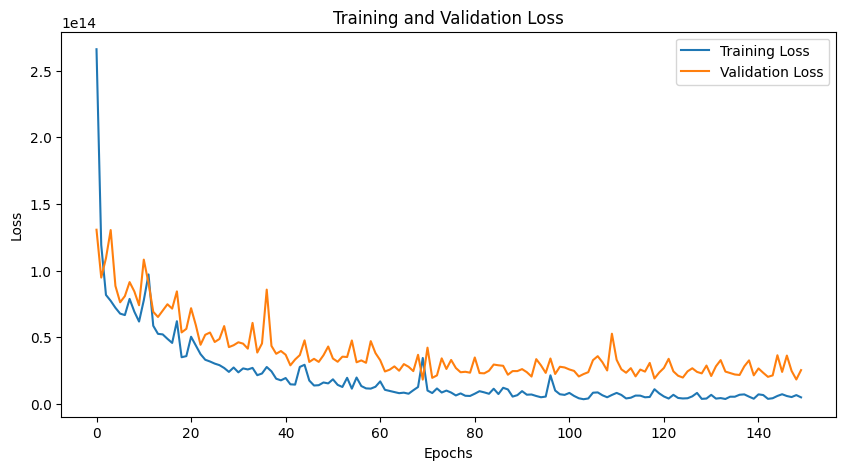

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Neural Network Model Evaluation
Mean Absolute Error (MAE): 1788630.0776473798
Mean Squared Error (MSE): 16039077072274.785
R² Score: 0.9531620702499135


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
data = merge_df

# Drop "Code" column
data = data.drop(columns=['Code'])

# Drop N/A value
data = data.dropna()

# Convert "Entity" to numerical codes
entity_dict = {entity: idx for idx, entity in enumerate(data['Entity'].unique())}
data['Entity'] = data['Entity'].map(entity_dict)

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])  # Features
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.2), loss='mean_squared_error')

# Train the model and save the training history
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.2, verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
y_pred_nn = model.predict(X_test)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Model Evaluation")
print("Mean Absolute Error (MAE):", mae_nn)
print("Mean Squared Error (MSE):", mse_nn)
print("R² Score:", r2_nn)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Evaluate the model using MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_nn)

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.25322114644444144


In [ ]:
nn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_nn.flatten()})
nn_df

,Actual,Predicted
218,4499000.0,4.027365e+06
826,4855000.0,4.564340e+06
501,5082000.0,3.354166e+06
666,908000.0,6.578630e+05
323,3583000.0,1.735588e+06
...,...,...
361,90914000.0,9.531346e+07
292,1220000.0,7.186059e+05
1136,6287000.0,1.753768e+07
557,50732000.0,5.609468e+07


# Approach 4: Other statistics models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = merge_df

# Drop "Code" column
data = data.drop(columns=['Code'])

# Drop N/A values
data = data.dropna()

# Convert "Entity" to numerical codes
entity_dict = {entity: idx for idx, entity in enumerate(data['Entity'].unique())}
data['Entity'] = data['Entity'].map(entity_dict)

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])  # Features
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Model Evaluation")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R² Score:", r2)
    print("-----------\n")


# Linear Regression
lr = LinearRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test)

# K-Nearest Neighbors
knn = KNeighborsRegressor()
evaluate_model(knn, X_train, X_test, y_train, y_test)

# Support Vector Machine
svr = SVR()
evaluate_model(svr, X_train, X_test, y_train, y_test)

# Gradient Boosting Machines
gbm = GradientBoostingRegressor(random_state=42)
evaluate_model(gbm, X_train, X_test, y_train, y_test)

LinearRegression Model Evaluation
Mean Absolute Error (MAE): 5700893.401264564
Mean Squared Error (MSE): 78511037565105.73
R² Score: 0.7707290484664229
-----------

KNeighborsRegressor Model Evaluation
Mean Absolute Error (MAE): 7233221.315283842
Mean Squared Error (MSE): 154537007174573.84
R² Score: 0.5487150879558236
-----------

SVR Model Evaluation
Mean Absolute Error (MAE): 10999874.755625334
Mean Squared Error (MSE): 401119437882391.0
R² Score: -0.17136441007605852
-----------

GradientBoostingRegressor Model Evaluation
Mean Absolute Error (MAE): 1990017.3163329305
Mean Squared Error (MSE): 8437614923868.247
R² Score: 0.9753601523777471
-----------



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = merge_df

# Drop "Code" column
data = data.drop(columns=['Code'])

# Drop N/A values
data = data.dropna()

# Convert "Entity" to numerical codes
entity_dict = {entity: idx for idx, entity in enumerate(data['Entity'].unique())}
data['Entity'] = data['Entity'].map(entity_dict)

# Define features (X) and target (y)
X = data.drop(columns=['in_tour_arrivals_ovn_vis_tourists'])  # Features
y = data['in_tour_arrivals_ovn_vis_tourists']  # Target

# Normalize feature data (X) using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Model Evaluation")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R² Score:", r2)
    print("-----------\n")

# Evaluate models
# Linear Regression
lr = LinearRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test)

# K-Nearest Neighbors
knn = KNeighborsRegressor()
evaluate_model(knn, X_train, X_test, y_train, y_test)

# Support Vector Machine
svr = SVR()
evaluate_model(svr, X_train, X_test, y_train, y_test)

# Gradient Boosting Machines
# For Gradient Boosting, normalization is not necessary, so use the original X
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.2, random_state=42)
gbm = GradientBoostingRegressor(random_state=42)
evaluate_model(gbm, X_train_tree, X_test_tree, y_train_tree, y_test_tree)

LinearRegression Model Evaluation
Mean Absolute Error (MAE): 5700893.38194389
Mean Squared Error (MSE): 78511037440446.38
R² Score: 0.7707290488304579
-----------

KNeighborsRegressor Model Evaluation
Mean Absolute Error (MAE): 2314386.1362445415
Mean Squared Error (MSE): 31328939169187.7
R² Score: 0.9085120268866549
-----------

SVR Model Evaluation
Mean Absolute Error (MAE): 10999892.923522078
Mean Squared Error (MSE): 401119940339662.25
R² Score: -0.1713658773711073
-----------

GradientBoostingRegressor Model Evaluation
Mean Absolute Error (MAE): 1990017.3163329305
Mean Squared Error (MSE): 8437614923868.247
R² Score: 0.9753601523777471
-----------



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns of interest
columns_of_interest = [
    'in_tour_arrivals_ovn_vis_tourists',
       'temperature_2m', 'Annual CO₂ emissions',
       'Annual greenhouse gas emissions in CO₂ equivalents',
       'primary_energy_consumption__twh', 'total_precipitation',
       'ny_gdp_pcap_pp_kd', 'ny_gdp_pcap_kd', 'inflation_rate', 'crime_rate',
       'intl_tourist_spending', 'number_of_UNESCO_WHS', 'Population',
       'political_stability', 'Overall Infrastructure Score',
       'purchasing_power_index'
]

# Subset the DataFrame to include only the numeric columns of interest
numeric_df = merge_df[columns_of_interest]

# Calculate the correlation matrix for the selected columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap for correlations
plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()